WILDCARD

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**RESEARCH**

In [ ]:
#import dataset from drive
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/WILDCARD/Research_Session_Giulio_2022_12_11_04_06.csv")
df

,TimeStamp,IsGazeRayValid,HitPointX,HitPointY,IsLeftEyeBlinking,IsRightEyeBlinking,IsFocusing,IsClicking
0,0.013916,True,-0.008803,-1.028998,0,0,1,0
1,0.049866,True,-0.006139,-1.093622,0,0,1,0
2,0.067001,True,-0.005152,-1.189588,0,0,1,0
3,0.081131,True,0.001823,-1.095554,0,0,1,0
4,0.095261,True,-0.036582,-1.021846,0,0,1,0
...,...,...,...,...,...,...,...,...
1553,21.665510,True,1.015700,0.642281,0,0,1,0
1554,21.679460,True,1.018646,0.491042,0,0,1,0
1555,21.692730,True,1.037039,0.236779,0,0,1,0
1556,21.707230,True,1.055184,0.022794,0,0,1,0


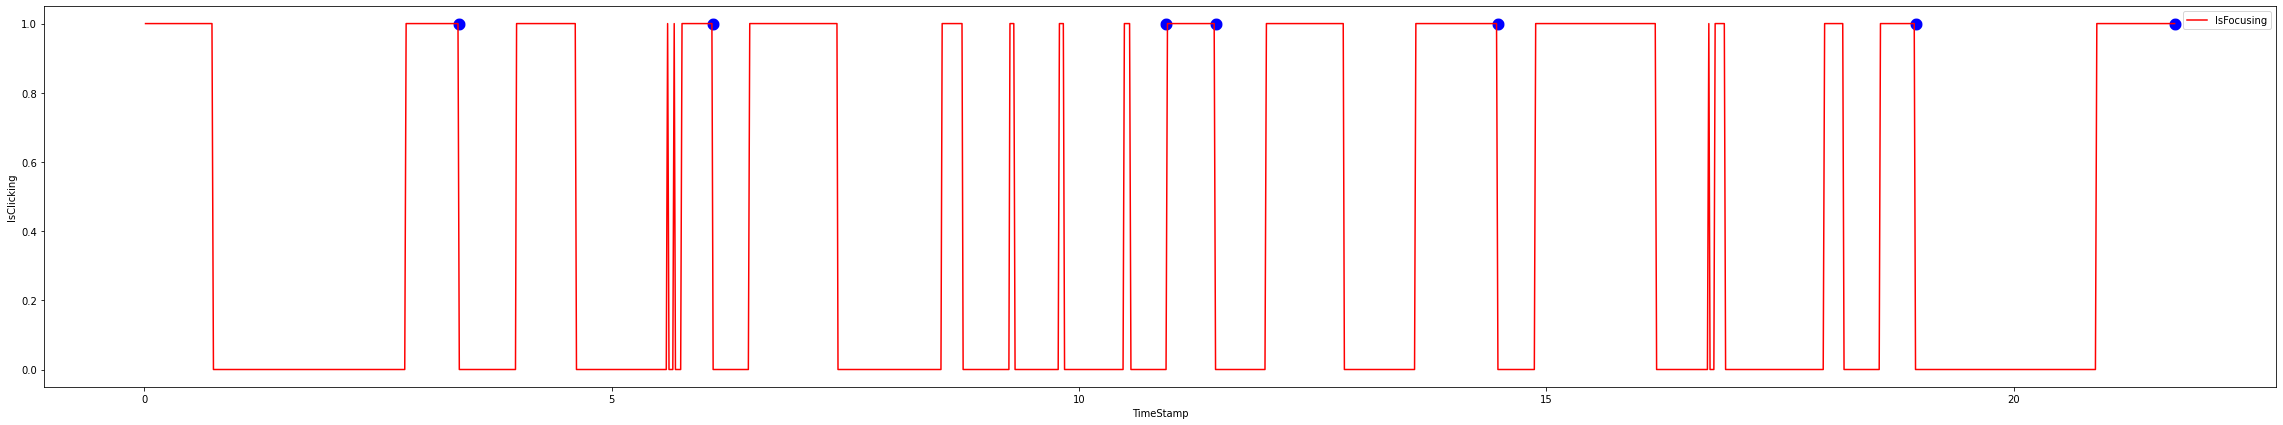

In [ ]:
#set to nan all the point where there is 0, so that are in the plot only the point 
#where the user is clicking(=1)
for i in df.index:
  if(df['IsClicking'][i]==0):
    df['IsClicking'][i]=float('nan')
    
#plot of interesting interactions
ax1=df.plot(x='TimeStamp',y='IsFocusing',color='red')
ax2=df.plot.scatter(x='TimeStamp',y='IsClicking',marker='o',color='blue',ax=ax1,linewidth=7.5,figsize=(40,7))

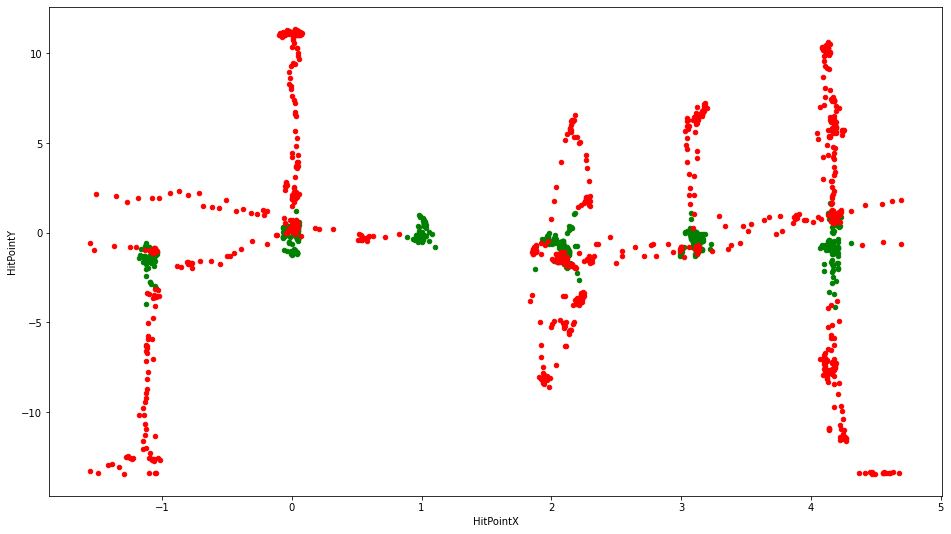

In [ ]:
#dataset where when the data are not well collected(=IsGazeRayValid) the value is set to nan 
#so not appear in the rappresentative plot
for i in df.index:
  if(df['IsGazeRayValid'][i]==False):
    df['HitPointX'][i]=float('nan')
    df['HitPointY'][i]=float('nan')

#select only 2 interesting coloumn for our modellization
df_1=df.loc[:,["HitPointX","HitPointY","IsFocusing"]]

df_mask_0=df_1['IsFocusing']==0
df_2=df_1[df_mask_0]

df_mask_1=df_1['IsFocusing']==1
df_3=df_1[df_mask_1]

#plot
ax1=df_3.plot.scatter(x="HitPointX", y="HitPointY",figsize=(16,9),color='green')
ax2=df_2.plot.scatter(x="HitPointX", y="HitPointY",figsize=(16,9),color='red',ax=ax1)

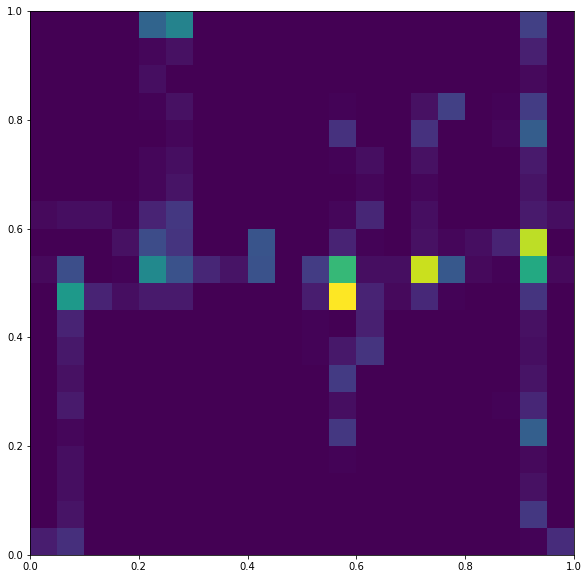

In [ ]:
#plot heatmap
import numpy as np
import numpy.random
import matplotlib.pyplot as plt

#drop the raw where there are null value
df_1_nan=df_1.dropna()
#crate an array x and y of the two colon above
x=df_1_nan.HitPointX.to_numpy()
y=df_1_nan.HitPointY.to_numpy()
 
# explicit function to normalize array
def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr
 
# assign array and range
range_to_normalize = (0, 1)
xnorm = normalize(
    x, range_to_normalize[0],
  range_to_normalize[1])
ynorm = normalize(
    y, range_to_normalize[0],
  range_to_normalize[1])

heatmap, xedges, yedges = np.histogram2d(xnorm, ynorm, bins=20)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

f=plt.figure(figsize=(10,10))
#plot heatmap
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

**STORY**

In [ ]:
#import dataset from drive
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/WILDCARD/Story_Session_Tobia_2022_12_11_04_02.csv")
df

,TimeStamp,IsGazeRayValid,HitPointX,HitPointY,IsLeftEyeBlinking,IsRightEyeBlinking,IsFocusing,IsPointing
0,0.016956,True,-0.473617,0.115474,0,0,0,0
1,0.288143,True,-0.501900,0.176741,0,0,0,0
2,0.304997,True,-0.391255,-0.305618,0,0,0,0
3,0.319756,True,-0.404239,-0.215339,0,0,0,0
4,0.342524,True,-0.351143,-0.935226,0,0,0,0
...,...,...,...,...,...,...,...,...
3186,44.680820,True,-1.034347,-0.987968,0,0,1,1
3187,44.693750,True,-1.031607,-1.158792,0,0,1,1
3188,44.708930,True,-1.041449,-1.030815,0,0,1,1
3189,44.722560,True,-1.028716,-1.013680,0,0,1,1


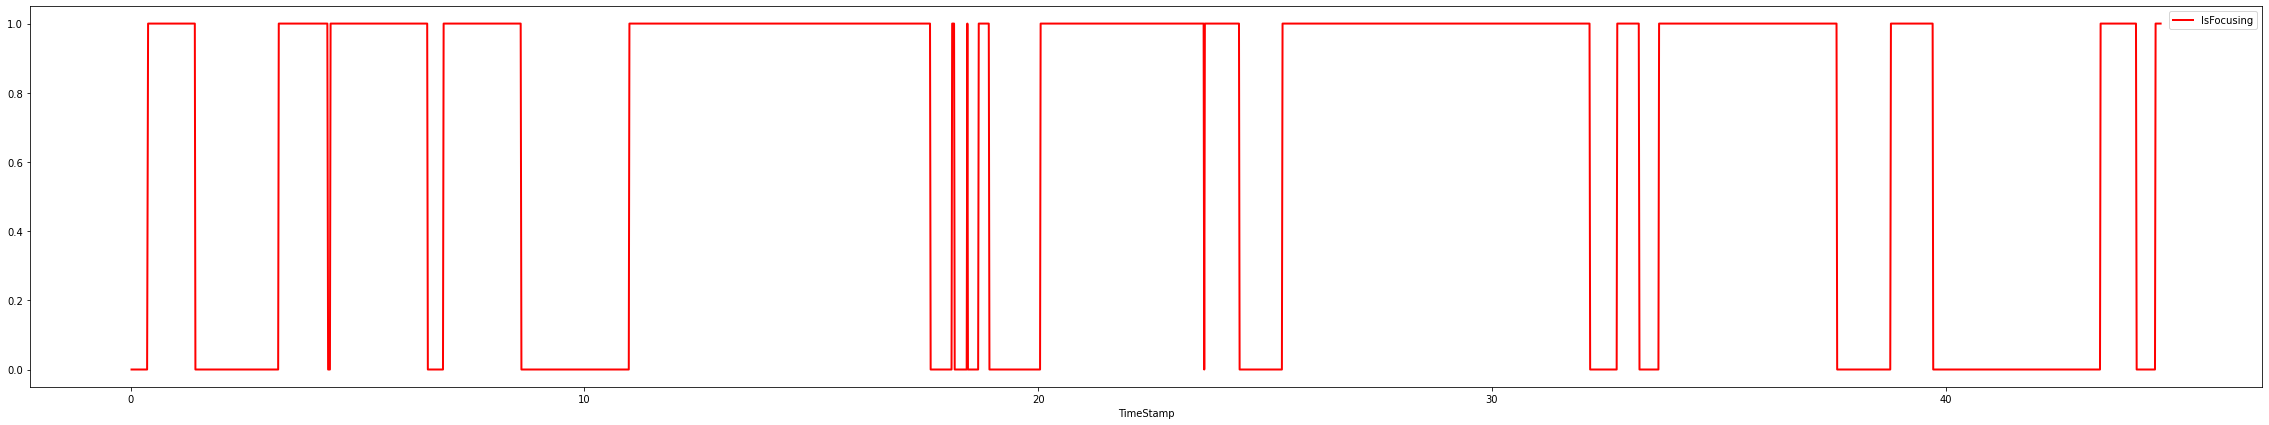

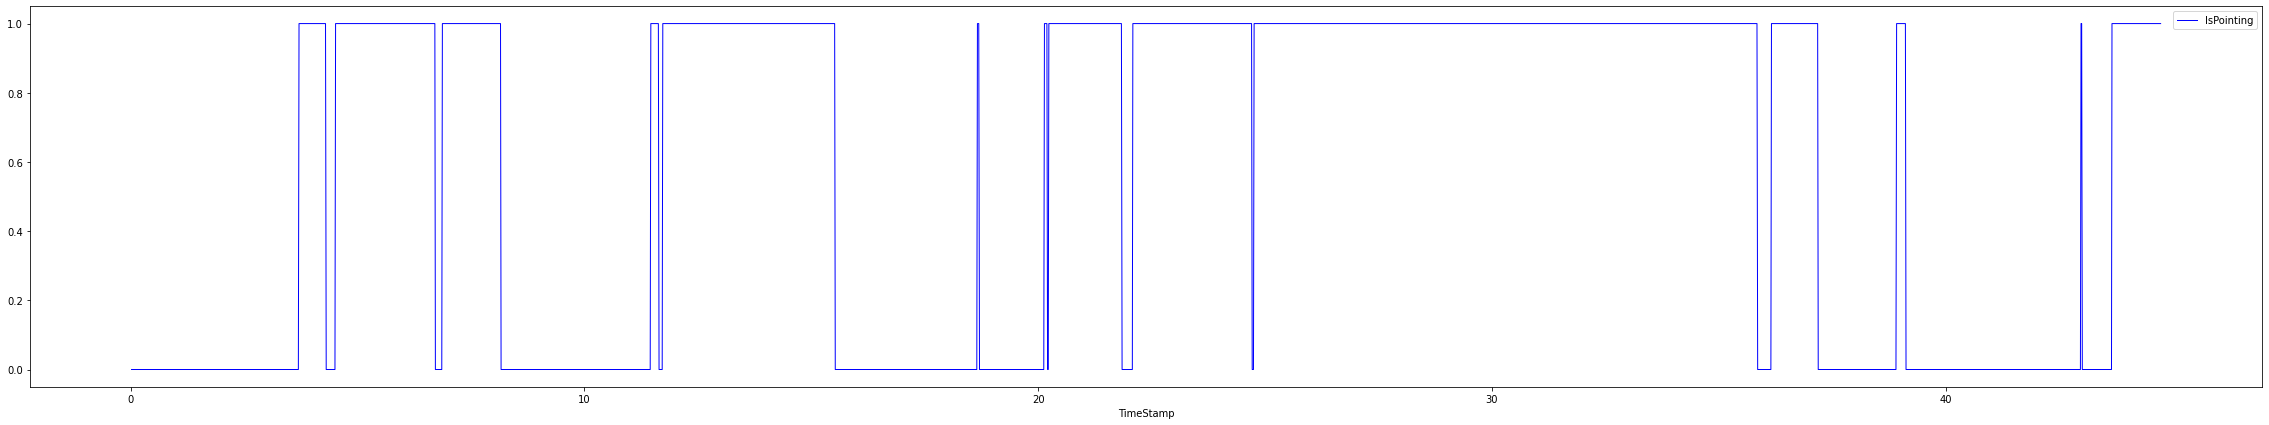

In [ ]:
#plot of interesting interactions
ax1=df.plot(x='TimeStamp',y='IsFocusing',color='red',figsize=(40,7),linewidth=2.0)
ax2=df.plot(x='TimeStamp',y='IsPointing',color='blue',figsize=(40,7),linewidth=1.0)

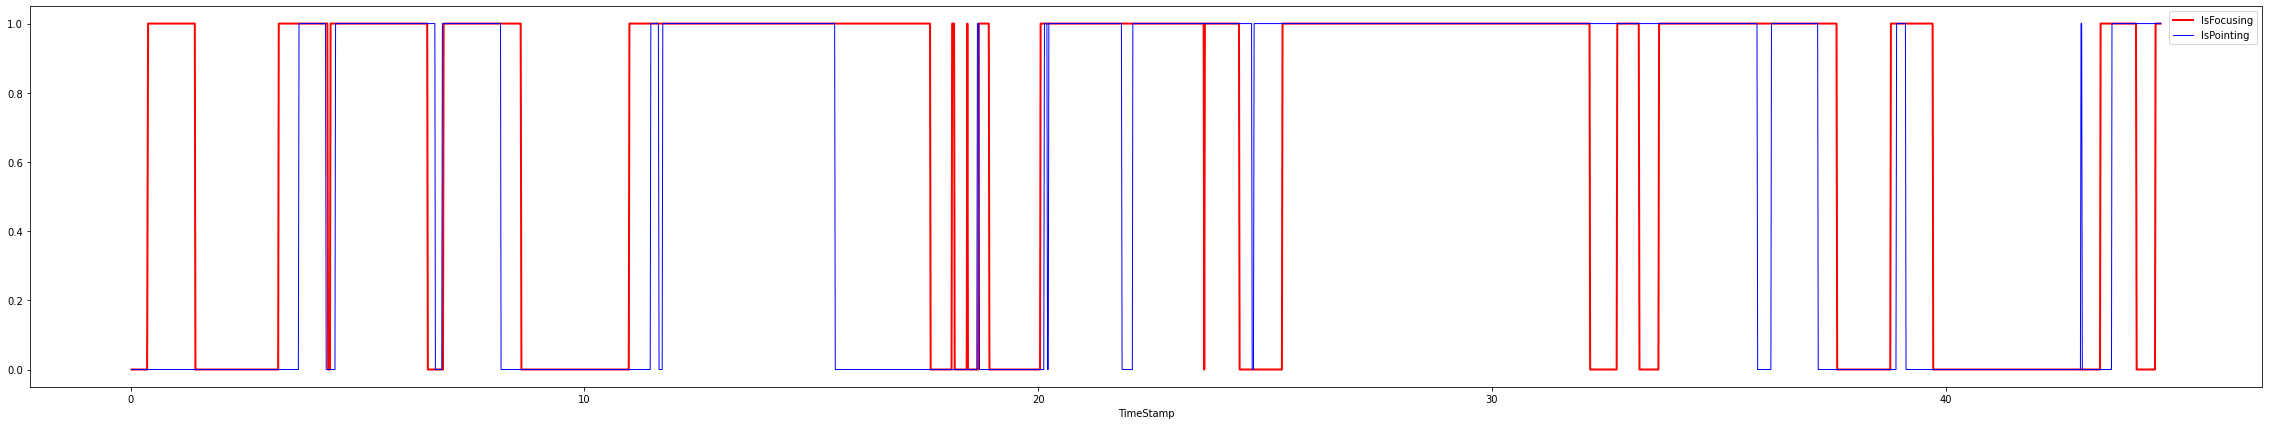

In [ ]:
#plot of interesting interactions
ax1=df.plot(x='TimeStamp',y='IsFocusing',color='red',linewidth=2.0)
ax2=df.plot(x='TimeStamp',y='IsPointing',color='blue',ax=ax1,figsize=(40,7),linewidth=1.0)

<ipython-input-114-d85d1d4898a8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HitPointX'][i]=float('nan')
<ipython-input-114-d85d1d4898a8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HitPointY'][i]=float('nan')


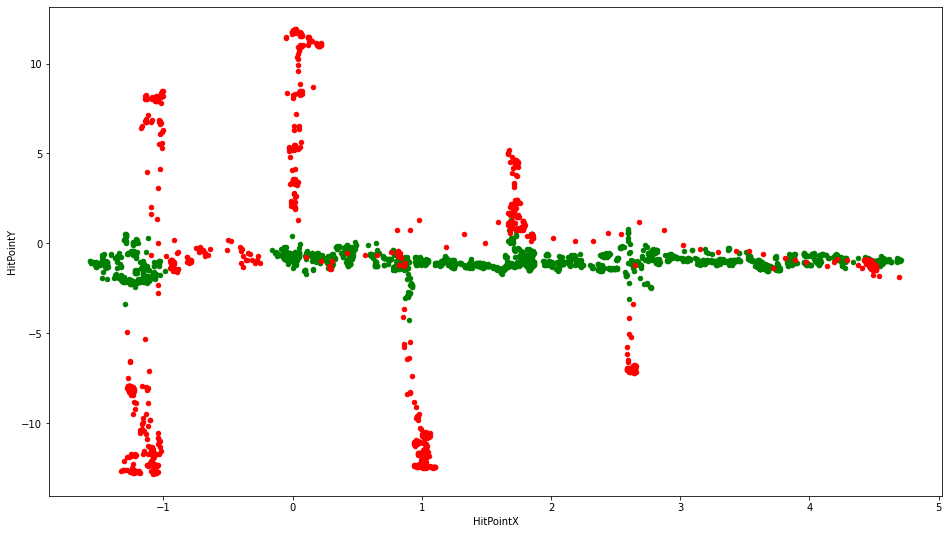

In [ ]:
#dataset where when the data are not well collected(=IsGazeRayValid) the value is set to nan 
#so not appear in the rappresentative plot
for i in df.index:
  if(df['IsGazeRayValid'][i]==False):
    df['HitPointX'][i]=float('nan')
    df['HitPointY'][i]=float('nan')
  
#select only 2 interesting coloumn for our modellization
df_1=df.loc[:,["HitPointX","HitPointY","IsFocusing"]]

df_mask_0=df_1['IsFocusing']==0
df_2=df_1[df_mask_0]

df_mask_1=df_1['IsFocusing']==1
df_3=df_1[df_mask_1]

#plot
ax1=df_3.plot.scatter(x="HitPointX", y="HitPointY",figsize=(16,9),color='green')
ax2=df_2.plot.scatter(x="HitPointX", y="HitPointY",figsize=(16,9),color='red',ax=ax1)


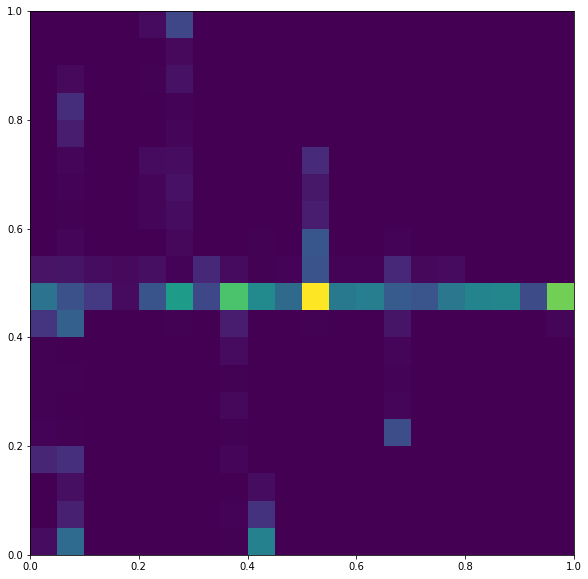

In [ ]:
#plot heatmap
import numpy as np
import numpy.random
import matplotlib.pyplot as plt

#drop the raw where there are null value
df_1_nan=df_1.dropna()
#crate an array x and y of the two colon above
x=df_1_nan.HitPointX.to_numpy()
y=df_1_nan.HitPointY.to_numpy()
 
# explicit function to normalize array
def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr
 
# assign array and range
range_to_normalize = (0, 1)
xnorm = normalize(
    x, range_to_normalize[0],
  range_to_normalize[1])
ynorm = normalize(
    y, range_to_normalize[0],
  range_to_normalize[1])

heatmap, xedges, yedges = np.histogram2d(xnorm, ynorm, bins=20)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

f=plt.figure(figsize=(10,10))
#plot heatmap
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

**EXPLORATON**

In [11]:
#import dataset from drive
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/WILDCARD/DataCollection/Exploration/Exploration_Session_Tobia_2022_12_12_10_49.csv")
df

,TimeStamp,IsGazeRayValid,HitPointX,HitPointY,ChildPositionX,ChildPositionY,IsLeftEyeBlinking,IsRightEyeBlinking,IsFocusing,IsPointing,IsLookingSky
0,0.014091,True,-0.092970,2.449999,0.019681,-0.011937,0,0,0,0,0
1,0.239553,True,-0.109752,2.449999,0.019804,-0.012115,0,0,0,0,0
2,0.248087,True,-0.117987,2.449999,0.019785,-0.013575,0,0,0,0,0
3,0.259767,True,-0.117798,2.449999,0.019771,-0.013707,0,0,0,0,0
4,0.277940,True,15.450000,0.832796,0.019741,-0.013885,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5676,79.289180,True,25.400000,19.789240,20.257480,20.154900,0,0,1,1,0
5677,79.303330,True,25.400000,19.777310,20.284480,20.154270,0,0,1,1,0
5678,79.317470,True,25.400000,19.778490,20.311430,20.153640,0,0,1,1,0
5679,79.331280,True,25.400000,19.754630,20.337720,20.153040,0,0,1,1,0


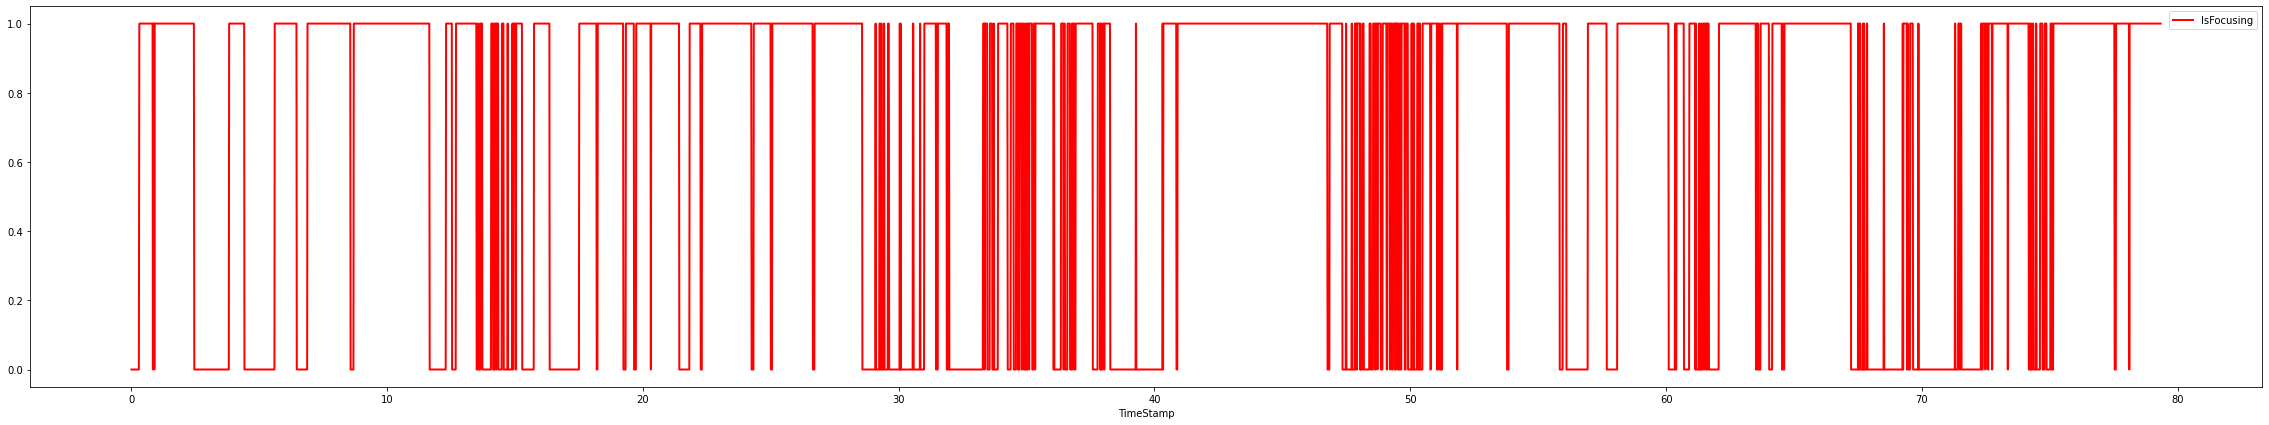

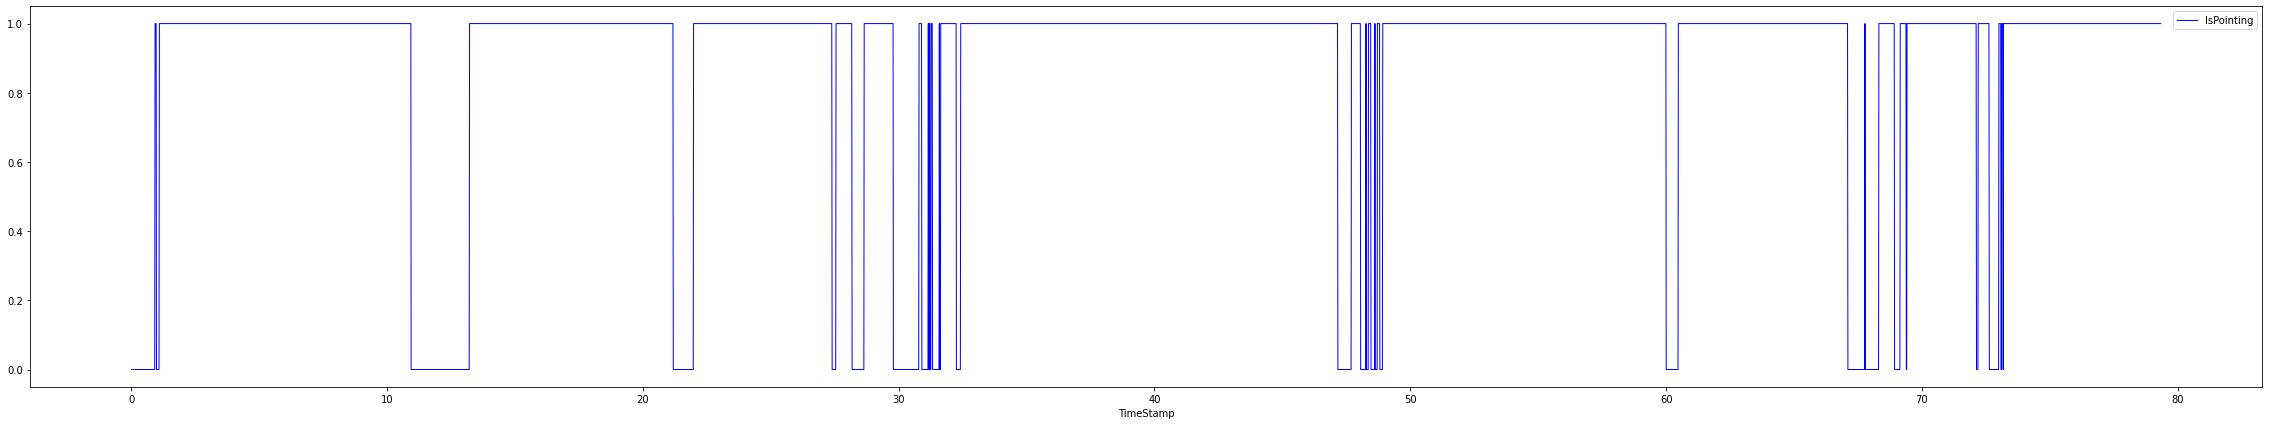

In [12]:
#plot of interesting interactions
ax1=df.plot(x='TimeStamp',y='IsFocusing',color='red',figsize=(40,7),linewidth=2.0)
ax2=df.plot(x='TimeStamp',y='IsPointing',color='blue',figsize=(40,7),linewidth=1.0)



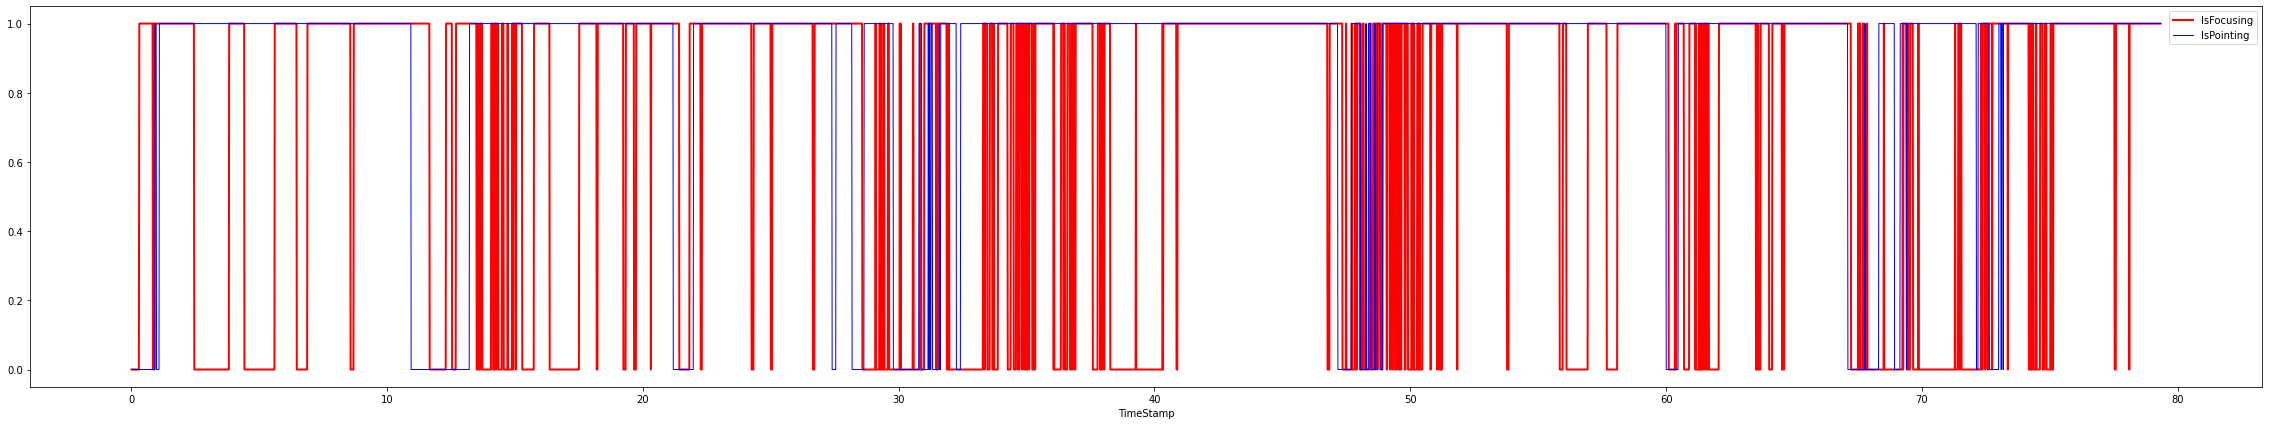

In [13]:
ax1=df.plot(x='TimeStamp',y='IsFocusing',color='red',figsize=(40,7),linewidth=2.0)
ax3=df.plot(x='TimeStamp',y='IsPointing',color='blue',ax=ax1,figsize=(40,7),linewidth=1.0)

<ipython-input-14-2e30379072ce>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HitPointX'][i]=float('nan')
<ipython-input-14-2e30379072ce>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HitPointY'][i]=float('nan')
<ipython-input-14-2e30379072ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HitPointX'][i]=float('nan')
<ipython-input-14-2e30379072ce>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of

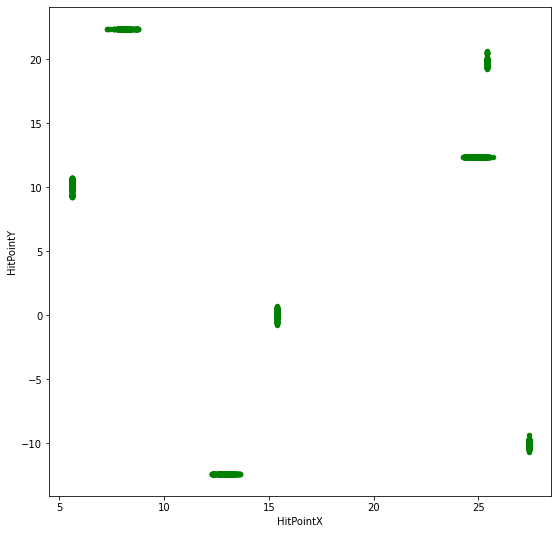

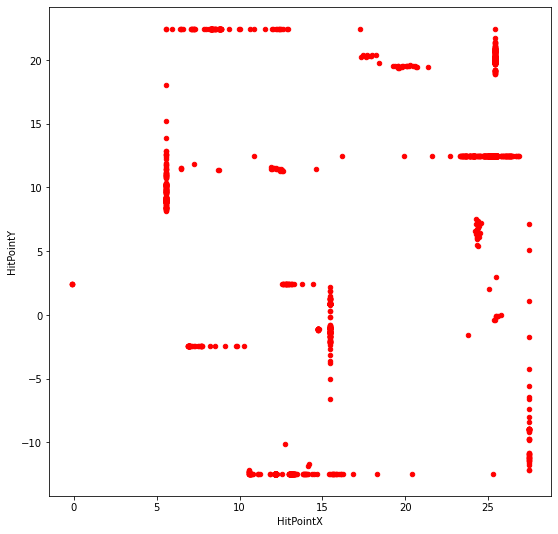

In [14]:
#dataset where when the data are not well collected(=IsGazeRayValid) the value is set to nan 
#so not appear in the rappresentative plot
for i in df.index:
  if(df['IsGazeRayValid'][i]==False):
    df['HitPointX'][i]=float('nan')
    df['HitPointY'][i]=float('nan')
  if(df['IsLookingSky'][i]==1):
    df['HitPointX'][i]=float('nan')
    df['HitPointY'][i]=float('nan')
  
#select only 2 interesting coloumn for our modellization
df_1=df.loc[:,["HitPointX","HitPointY","IsFocusing"]]

df_mask_0=df_1['IsFocusing']==0
df_2=df_1[df_mask_0]

df_mask_1=df_1['IsFocusing']==1
df_3=df_1[df_mask_1]

#plot
ax1=df_3.plot.scatter(x="HitPointX", y="HitPointY",figsize=(9,9),color='green')
ax2=df_2.plot.scatter(x="HitPointX", y="HitPointY",figsize=(9,9),color='red')

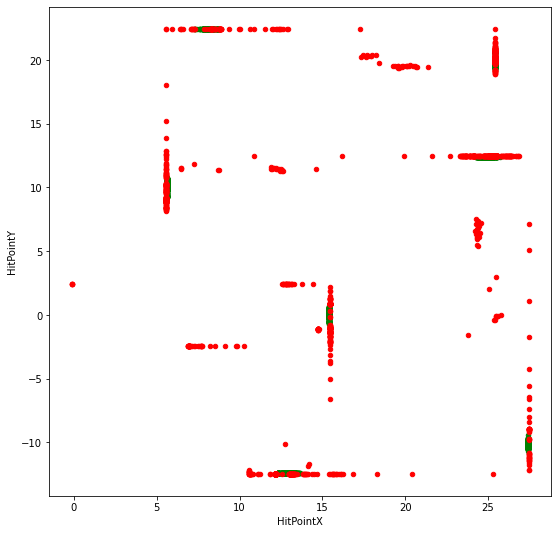

In [15]:
ax1=df_3.plot.scatter(x="HitPointX", y="HitPointY",figsize=(9,9),color='green')
ax2=df_2.plot.scatter(x="HitPointX", y="HitPointY",figsize=(9,9),color='red', ax=ax1)

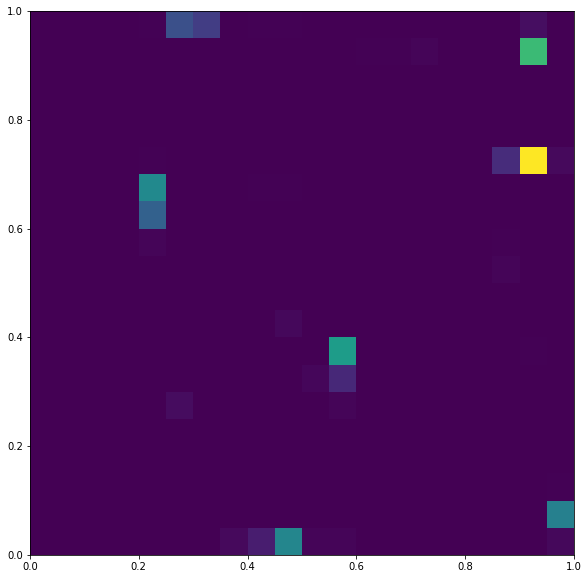

In [16]:
#plot heatmap
import numpy as np
import numpy.random
import matplotlib.pyplot as plt

#drop the raw where there are null value
df_1_nan=df_1.dropna()
#crate an array x and y of the two colon above
x=df_1_nan.HitPointX.to_numpy()
y=df_1_nan.HitPointY.to_numpy()
 
# explicit function to normalize array
def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr
 
# assign array and range
range_to_normalize = (0, 1)
xnorm = normalize(
    x, range_to_normalize[0],
  range_to_normalize[1])
ynorm = normalize(
    y, range_to_normalize[0],
  range_to_normalize[1])

heatmap, xedges, yedges = np.histogram2d(xnorm, ynorm, bins=20)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

f=plt.figure(figsize=(10,10))
#plot heatmap
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

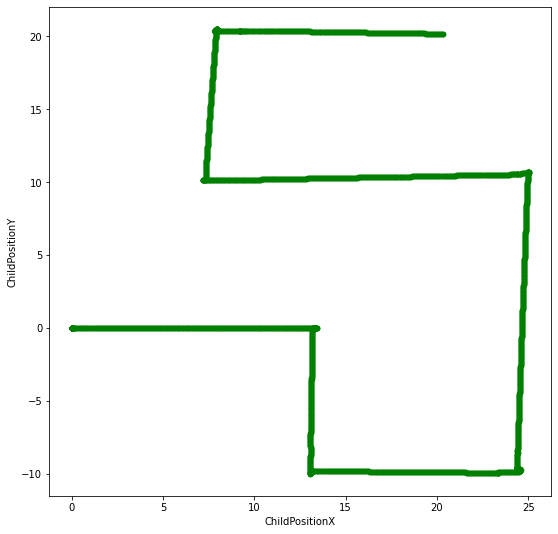

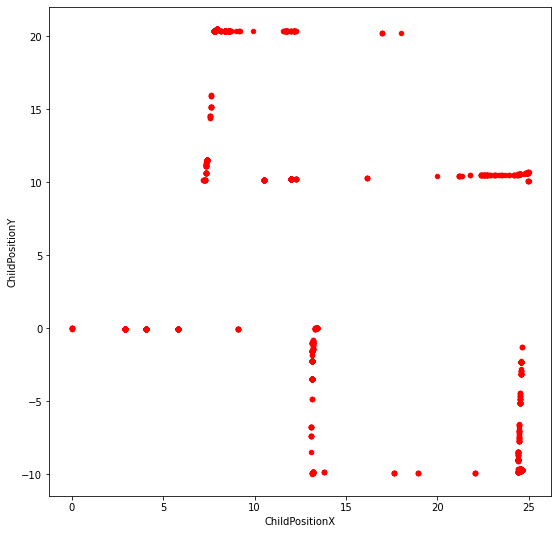

In [17]:
#select only 2 interesting coloumn for our modellization
df_1=df.loc[:,["ChildPositionX","ChildPositionY","IsFocusing"]]

df_mask_0=df_1['IsFocusing']==0
df_2=df_1[df_mask_0]

df_mask_1=df_1['IsFocusing']==1
df_3=df_1[df_mask_1]

#plot
ax1=df_3.plot.scatter(x="ChildPositionX", y="ChildPositionY",figsize=(9,9),color='green')
ax2=df_2.plot.scatter(x="ChildPositionX", y="ChildPositionY",figsize=(9,9),color='red')

#ax1=df.plot.scatter(x="ChildPositionX", y="ChildPositionY",figsize=(9,9),color='blue')


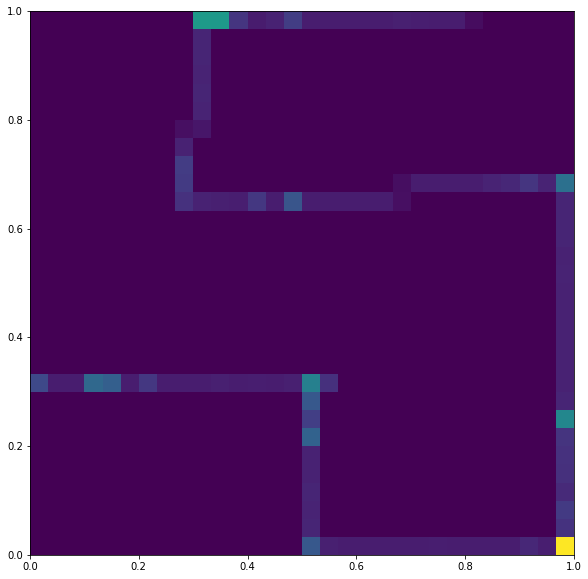

In [18]:
#plot heatmap
import numpy as np
import numpy.random
import matplotlib.pyplot as plt

#drop the raw where there are null value
df_1_nan=df.dropna()
#crate an array x and y of the two colon above
x=df_1_nan.ChildPositionX.to_numpy()
y=df_1_nan.ChildPositionY.to_numpy()
 
# explicit function to normalize array
def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr
 
# assign array and range
range_to_normalize = (0, 1)
xnorm = normalize(
    x, range_to_normalize[0],
  range_to_normalize[1])
ynorm = normalize(
    y, range_to_normalize[0],
  range_to_normalize[1])

heatmap, xedges, yedges = np.histogram2d(xnorm, ynorm, bins=30)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

f=plt.figure(figsize=(10,10))
#plot heatmap
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()